In [1]:
#!pip install freetype-py svgpathtools shapely matplotlib

In [2]:
FONT_NAME = "Arial"
FONT_SIZE = 40            # mm

SAFE_Z = 2.0
CUT_Z = -1.0
FEED_RATE = 1000           # mm/min

text = "Hello"


In [3]:
# TODO GEORGI Tape roll diameter adjustment

In [4]:
from calculate_paths import PathCalculator


calc = PathCalculator(FONT_NAME, FONT_SIZE)

all_paths = calc.generate_paths(text)
print(f'Generated {len(all_paths)} paths')

Generated 7 paths


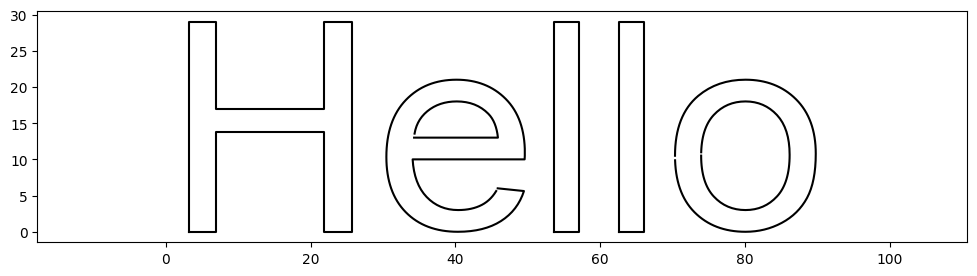

Plotted 426 contours


In [5]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 3))

contours_count = 0

for contour in all_paths:
    plt.plot(contour[:, 0], contour[:, 1], 'k-')
    contours_count += len(contour)

plt.axis('equal')
#plt.gca().invert_yaxis()
plt.show()

print(f'Plotted {contours_count} contours')


In [6]:
def contours_to_gcode(contours):
    gcode = []
    gcode.append("G21  ; mm mode")
    gcode.append("G90  ; absolute positioning")

    for contour in contours:
        x0, y0 = contour[0]
        gcode.append(f"G0 Z{SAFE_Z}")
        gcode.append(f"G0 X{x0:.3f} Y{y0:.3f}")
        gcode.append(f"G1 Z{CUT_Z} F{FEED_RATE}")

        for x, y in contour[1:]:
            gcode.append(f"G1 X{x:.3f} Y{y:.3f}")

        gcode.append(f"G0 Z{SAFE_Z}")

    return gcode


In [7]:
gcode = contours_to_gcode(all_paths)

print("\n".join(gcode[:20]))


G21  ; mm mode
G90  ; absolute positioning
G0 Z2.0
G0 X3.203 Y0.000
G1 Z-1.0 F1000
G1 X3.203 Y29.000
G1 X3.203 Y29.000
G1 X7.000 Y29.000
G1 X7.000 Y29.000
G1 X7.000 Y17.000
G1 X7.000 Y17.000
G1 X21.875 Y17.000
G1 X21.875 Y17.000
G1 X21.875 Y29.000
G1 X21.875 Y29.000
G1 X25.672 Y29.000
G1 X25.672 Y29.000
G1 X25.672 Y0.000
G1 X25.672 Y0.000
G1 X21.875 Y0.000


In [8]:
with open("text.nc", "w") as f:
    f.write("\n".join(gcode))
